# Code Conversion with LLM's

### Setup the project

This project requires the openai package  
```pip install --user openai```  
and an environment variable set with your [OpenAI API Key](https://platform.openai.com/account/api-keys)  
export OPENAI_API_KEY=\<insert key here\>

In [7]:
!python --version

Python 3.9.15


In [2]:
import os
import openai

# OPENAI_API_KEY is a user environment variable set in your Domino account settings
openai.api_key = os.getenv("OPENAI_API_KEY")
llmModel="text-davinci-003"
langFrom="SAS"
langTo="Python"

### Setup the prompt for the conversion
Paste the code you want to convert between the triple quotes below

In [3]:
code="""
/* Load the input dataset */
proc import out=cars_data
    datafile="/mnt/data/mtcars.csv"
    dbms=csv
    replace;
    getnames=YES;
run;

/* Sort the input dataset by displacement */
proc sort data=cars_data;
      by disp;
run;

/* Perform the linear regression */
proc reg data=cars_data;
      model mpg = disp / noprint;
      output out=output_data predicted=mpg_predicted;
run;

/* Print the regression results */
/* In this case a scatter plot with regression line best fit */
proc sgplot data=output_data;
      scatter x=disp y=mpg / markerattrs=(symbol=circlefilled) name='scatter';
      series x=disp y=mpg_predicted / lineattrs=(color=blue) name='regression';
      keylegend 'scatter' 'regression';
run;
"""

### Run the conversion

In [4]:
llmPrompt="##### Translate this program from {} into {}\n### {}".format(langFrom, langTo, langFrom)+code+"### {}".format(langTo)
#print({llmPrompt})

In [5]:
response = openai.Completion.create(
  model=llmModel,
  prompt=llmPrompt,
  temperature=0,
  max_tokens=300,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0,
  stop=["###"]
)

# Results

In [6]:
print(response["choices"][0]["text"])


# Load the input dataset
import pandas as pd
cars_data = pd.read_csv("/mnt/data/mtcars.csv")

# Sort the input dataset by displacement
cars_data.sort_values(by='disp', inplace=True)

# Perform the linear regression
import statsmodels.api as sm
X = cars_data['disp']
y = cars_data['mpg']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the regression results
# In this case a scatter plot with regression line best fit
import matplotlib.pyplot as plt
plt.scatter(cars_data['disp'], cars_data['mpg'], label='scatter')
plt.plot(cars_data['disp'], model.predict(X), color='blue', label='regression')
plt.legend()
plt.show()


---
**Copy the code above into the cell below**  
Then run the cell to verify a working conversion

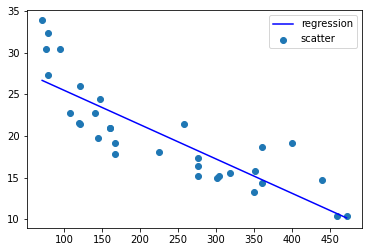

In [9]:
# Load the input dataset
import pandas as pd
cars_data = pd.read_csv("/mnt/data/mtcars.csv")

# Sort the input dataset by displacement
cars_data.sort_values(by='disp', inplace=True)

# Perform the linear regression
import statsmodels.api as sm
X = cars_data['disp']
y = cars_data['mpg']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the regression results
# In this case a scatter plot with regression line best fit
import matplotlib.pyplot as plt
plt.scatter(cars_data['disp'], cars_data['mpg'], label='scatter')
plt.plot(cars_data['disp'], model.predict(X), color='blue', label='regression')
plt.legend()
plt.show()